In [84]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("../data/data_limpio.csv",sep=",")

Quitamos la columna 'Unnamed: 0':

In [85]:
df = df.drop(columns='Unnamed: 0')

In [86]:
df

,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,7.000000,3770.000000,0.1754,8.589305,10.8,432.0,3.6
1,10.635066,6049.000000,-0.0416,10.300000,10.3,762.0,6.2
2,13.790000,2034.000000,0.0335,7.700000,7.7,457.0,2.5
3,13.790000,3679.000000,-0.0279,5.600000,15.2,2134.0,3.0
4,17.240000,3648.000000,-0.0711,8.589305,1.9,696.0,3.6
...,...,...,...,...,...,...,...
21224,12.070000,3070.487779,-0.0195,8.589305,1.9,152.0,5.4
21225,10.635066,3648.000000,-0.0487,4.700000,4.7,318.0,9.0
21226,10.635066,1736.000000,0.0886,8.589305,7.8,591.0,2.3
21227,18.270000,658.000000,-0.1224,3.000000,3.0,150.0,2.3


# Visualizamos la variable que nos interesa

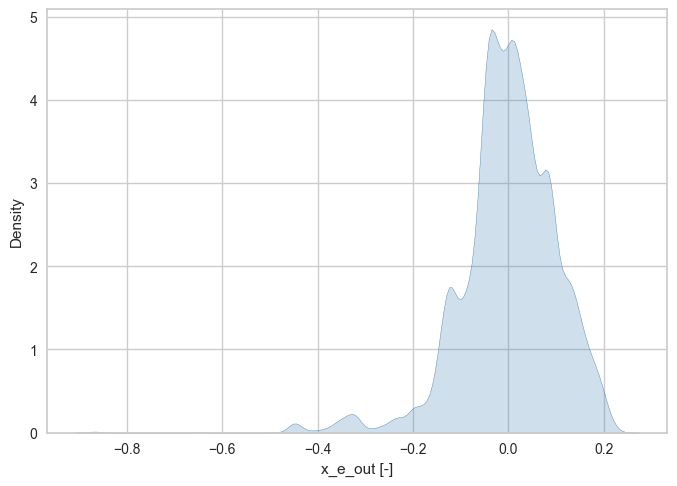

In [87]:
sns.kdeplot(data = df, x = 'x_e_out [-]', fill = True, color = 'steelblue');

# Hacemos una matriz de correlación

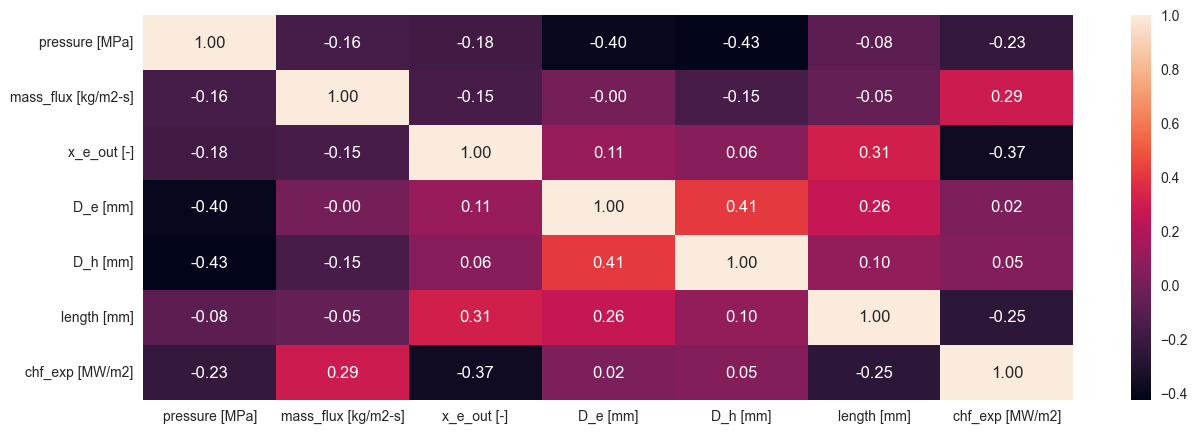

In [88]:
plt.figure(figsize=(15,5))

corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f');

Hacemos una segunda matriz enfocada en nuestro target:

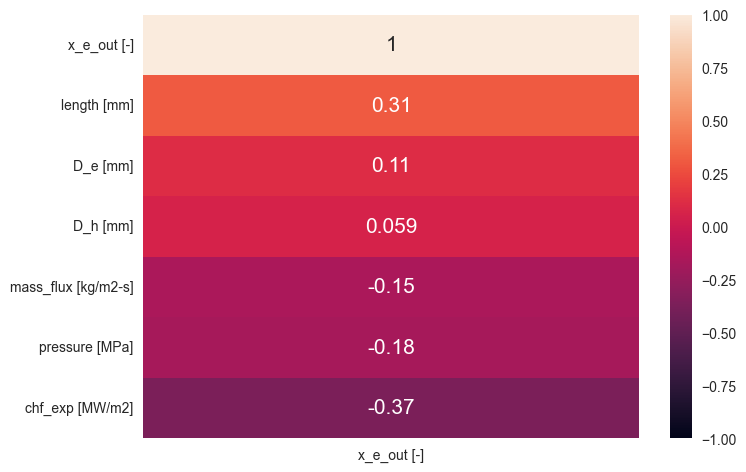

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr()[['x_e_out [-]']].sort_values(by='x_e_out [-]', ascending=False), vmin=-1, vmax=1, annot=True, annot_kws={"size":15});

Miramos a la variable que mejor se relaciona con el target

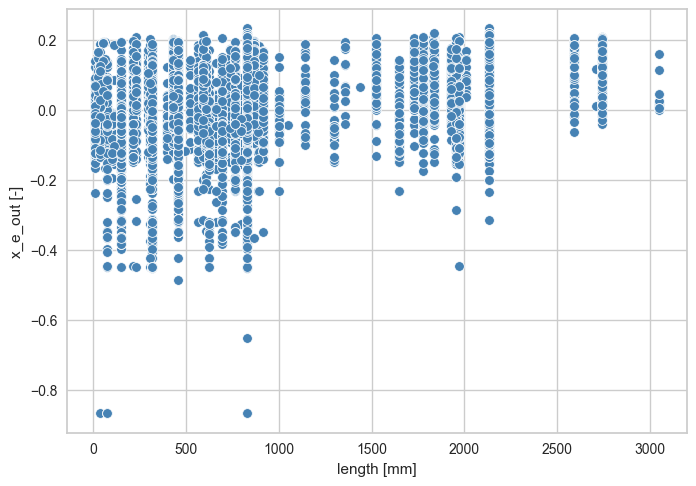

In [90]:
sns.scatterplot(data = df, x = 'length [mm]', y = 'x_e_out [-]', color = 'steelblue');

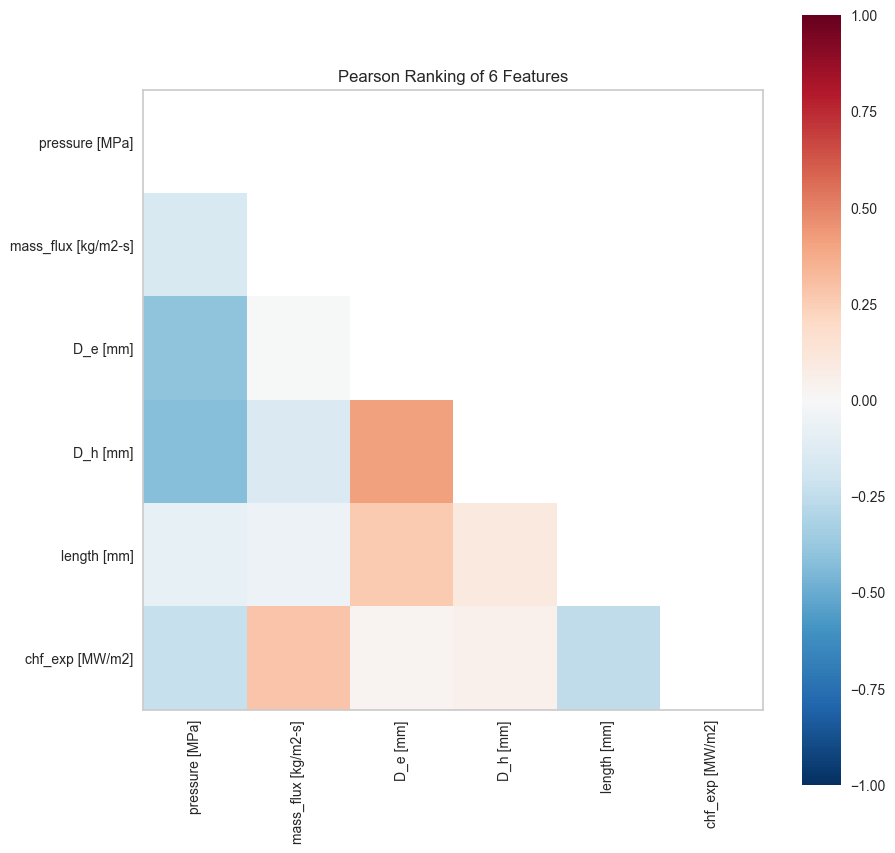

In [96]:
from yellowbrick.features import Rank2D

plt.figure(figsize=(10, 10))

visualizer = Rank2D(algorithm='pearson')
visualizer.fit(X_train, y_train)           
visualizer.transform(X)        
visualizer.show();

# Creamos un árbol de decisión

In [97]:
from sklearn.model_selection import train_test_split

X = df[['pressure [MPa]', 'mass_flux [kg/m2-s]', 'D_e [mm]', 'D_h [mm]', 'length [mm]', 'chf_exp [MW/m2]']]
y = df['x_e_out [-]']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_test, y_test)

DecisionTreeRegressor()

In [99]:
y_pred = tree.predict(X_test)

Medimos el MSE y la pontuación R2 del modelo

In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.00014387525278693674
R2 Score: 0.9858356955250662
